In [1]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import os

In [2]:
model_path = "mediapipe/exported_model/model.tflite"

assert os.path.exists(model_path), f"model not found: {model_path}"

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

MARGIN = 10  # pixels
ROW_SIZE = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1


class_color_map = {
    "box": "blue",
    "green_light": "green",
    "left_arrow": "orange",
    "no_light": "black",
    "person": "purple",
    "red_light": "red",
    "right_arrow": "yellow",
    "tree": "brown",
    "unknown_arrow": "gray",
}


def visualize(image, detection_result):
    """Draws bounding boxes on the input image and return it.
    Args:
      image: The input RGB image.
      detection_result: The list of all "Detection" entities to be visualize.
    Returns:
      Image with bounding boxes.
    """
    plt.imshow(image)
    for detection in detection_result.detections:
        # Draw bounding_box
        bbox = detection.bounding_box
        start_point = (bbox.origin_x, bbox.origin_y)
        width = bbox.width
        height = bbox.height

        # Draw label and score
        category = detection.categories[0]
        category_name = category.category_name
        category_color = class_color_map[category_name]
        rect = plt.Rectangle(
            start_point,
            width,
            height,
            fill=False,
            edgecolor=category_color,
            linewidth=2,
        )
        plt.gca().add_patch(rect)

        probability = round(category.score, 2)
        result_text = category_name + " (" + str(probability) + ")"
        text_location = (MARGIN + bbox.origin_x, MARGIN + ROW_SIZE + bbox.origin_y)
        print(text_location)
        plt.text(*text_location, result_text, color=category_color, fontweight="bold")

E0000 00:00:1714852375.363980   30600 gl_context.cc:408] INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:303) successeglMakeCurrent() returned error 0x3008;  (entering GL context)
I0000 00:00:1714852375.364047   30600 task_runner.cc:85] GPU suport is not available: INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:77) display != EGL_NO_DISPLAYeglGetDisplay() returned error 0x300c
E0000 00:00:1714852375.393491   30600 gl_context.cc:408] INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:303) successeglMakeCurrent() returned error 0x3008;  (entering GL context)
E0000 00:00:1714852375.393511   30600 gl_context.cc:408] INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:303) successeglMakeCurrent() returned error 0x3008;  (entering GL context)
E0000 00:00:1714852375.393519   30600 gl_context.cc:408] INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:303) successeglMakeCurrent() returned error 0x3008;  (entering GL context)
INFO

[Detection(bounding_box=BoundingBox(origin_x=210,
                                    origin_y=45,
                                    width=49,
                                    height=46),
           categories=[Category(index=None,
                                score=0.9486579298973083,
                                display_name=None,
                                category_name='box')],
           keypoints=[]),
 Detection(bounding_box=BoundingBox(origin_x=260,
                                    origin_y=25,
                                    width=17,
                                    height=39),
           categories=[Category(index=None,
                                score=0.7248438596725464,
                                display_name=None,
                                category_name='person')],
           keypoints=[])]
[[[175 180 167]
  [175 180 167]
  [175 180 165]
  ...
  [  9  11  10]
  [ 10  10  10]
  [ 10  10  10]]

 [[177 180 161]
  [176 179 160]
  [173 

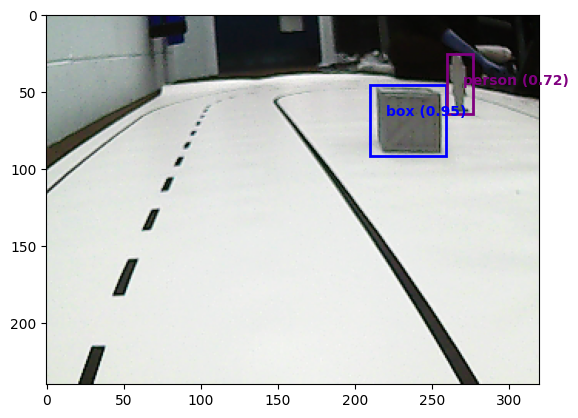

In [4]:
BaseOptions = mp.tasks.BaseOptions
ObjectDetector = mp.tasks.vision.ObjectDetector
ObjectDetectorOptions = mp.tasks.vision.ObjectDetectorOptions
VisionRunningMode = mp.tasks.vision.RunningMode

options = ObjectDetectorOptions(
    base_options=BaseOptions(model_asset_path=model_path),
    max_results=5,
    running_mode=VisionRunningMode.IMAGE,
    score_threshold=0.5,
)

with ObjectDetector.create_from_options(options) as detector:
    mp_image = mp.Image.create_from_file(
        "label_data/test/downloads_images/1709570998863_90_35.png"
    )
    detection_result = detector.detect(mp_image)
from pprint import pprint

pprint(detection_result.detections)

# Visualize the detection result
image_copy = np.copy(mp_image.numpy_view())
print(image_copy)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
print(image_copy.shape)
visualize(image_copy, detection_result)